In [58]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [59]:
'''
Read the Constant Files AKA the job posting of the last two fiscal years
Merge them. These will become the master file
Export them as CSV
'''

fy_19_20 = pd.read_csv(r"C:\Users\sushmita-khan\Desktop\Job Posting reports\report_sep19.csv", header=0)
# FY_19_20['Job Type'].unique()
fy_19_20

,Job Type,FY19_20,FY18_19,jul_sep19,jul_sep18,19_Sep,18_Sep
0,Coop,74,145,74,21,23,1
1,Full Time,490,2103,490,612,174,170
2,Internship,145,711,145,260,59,88
3,Part Time,57,213,57,65,16,22
4,Temp/Season/Campus,18,255,18,23,7,17
5,Volunteer/JS/WS,3,16,3,5,0,6


In [60]:
# fy_19_20.ProfileReport()

# profile = pandas_profiling.ProfileReport(fy_19_20)
# print(profile)

monthly_post = fy_19_20[['Job Type','FY19_20','19_Sep']]
display(monthly_post)

,Job Type,FY19_20,19_Sep
0,Coop,74,23
1,Full Time,490,174
2,Internship,145,59
3,Part Time,57,16
4,Temp/Season/Campus,18,7
5,Volunteer/JS/WS,3,0


In [61]:
month_comp = fy_19_20[['Job Type', '19_Sep', '18_Sep']]
ytd_comp = fy_19_20[['Job Type','jul_sep19','jul_sep18']]
ytd_comp = ytd_comp.sort_values(by=['jul_sep19', 'jul_sep18'],ascending=True)

,19_Sep,18_Sep
count,6.000000,6.000000
mean,46.500000,50.666667
std,65.753327,66.409839
min,0.000000,1.000000
25%,9.250000,8.750000
50%,19.500000,19.500000
75%,50.000000,71.500000
max,174.000000,170.000000


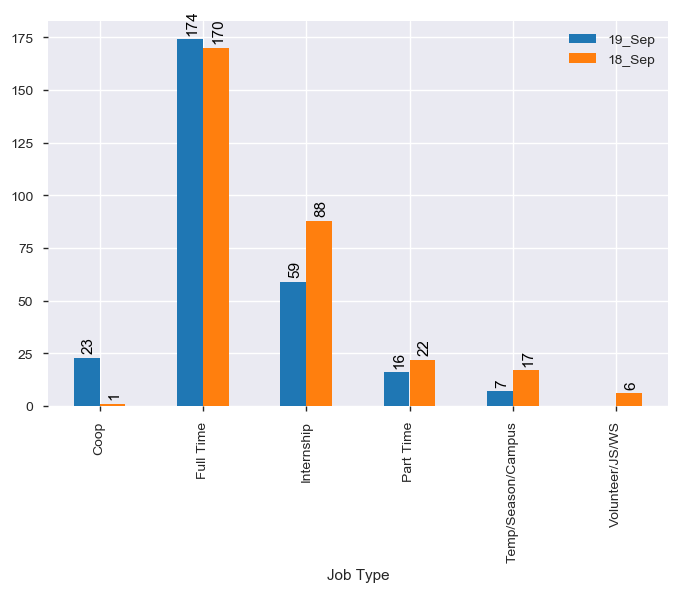

In [62]:
month_comp_ = month_comp.plot.bar(x='Job Type',figsize=(8,5))

totals = []

# find the values and append to list
for i in month_comp_.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in month_comp_.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        month_comp_.text(i.get_x()+0.08, i.get_height()+3.5, \
                str(i.get_height()), fontsize=11, color='black',rotation=90)
        
display(month_comp.describe())

,jul_sep19,jul_sep18
count,6.000000,6.000000
mean,131.166667,164.333333
std,182.731953,238.885468
min,3.000000,5.000000
25%,27.750000,21.500000
50%,65.500000,44.000000
75%,127.250000,211.250000
max,490.000000,612.000000


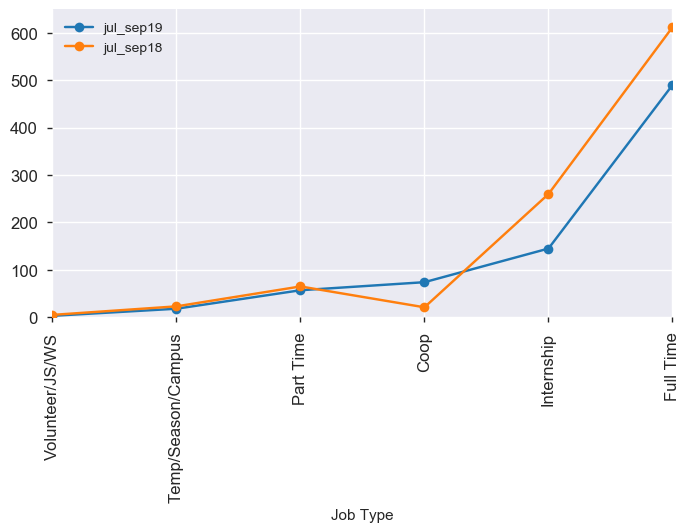

In [65]:
fig, ax = plt.subplots(1, 1)

ytd_comp.plot(ax=ax, x='Job Type', ylim=(0, 650), legend=True,figsize=(8,4), marker='o', fontsize=12, rot=90)

display(ytd_comp.describe())